In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("Supervised Learning notebook started...")

Supervised Learning notebook started...


In [2]:
file_path = '../data/healthcare_dataset.csv'
try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")

Dataset loaded successfully.


In [3]:
print("\n--- Preprocessing Data ---")

# Drop columns that are identifiers or less relevant for prediction
# 'Name', 'Date of Admission', 'Discharge Date', 'Doctor', 'Hospital' are high-cardinality and likely not predictive.
# 'Room Number' is also likely just an identifier.
df_processed = df.drop([
    'Name', 'Date of Admission', 'Discharge Date', 
    'Doctor', 'Hospital', 'Room Number'
], axis=1)

# Check for missing values (from Task 1, we know there are none, but it's good practice)
print("Missing values check:")
print(df_processed.isnull().sum())

# Convert categorical features into numerical ones using LabelEncoder
# We will encode all 'object' type columns
le_map = {} # To store encoders if we need to decode later
for col in df_processed.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])
    le_map[col] = le
    print(f"Encoded column: {col}")

# Display the processed data head
print("\nProcessed Data Head:")
print(df_processed.head())


--- Preprocessing Data ---
Missing values check:
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Insurance Provider    0
Billing Amount        0
Admission Type        0
Medication            0
Test Results          0
dtype: int64
Encoded column: Gender
Encoded column: Blood Type
Encoded column: Medical Condition
Encoded column: Insurance Provider
Encoded column: Admission Type
Encoded column: Medication
Encoded column: Test Results

Processed Data Head:
   Age  Gender  Blood Type  Medical Condition  Insurance Provider  \
0   30       1           5                  2                   1   
1   62       1           0                  5                   3   
2   76       0           1                  5                   0   
3   28       0           6                  3                   3   
4   43       0           2                  2                   0   

   Billing Amount  Admission Type  Medication  Test Results  
0    18856.28130

In [4]:
X = df_processed.drop('Test Results', axis=1)
y = df_processed['Test Results']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nData split into: {X_train.shape[0]} training samples and {X_test.shape[0]} testing samples.")


Data split into: 44400 training samples and 11100 testing samples.


In [6]:
print("\n--- Training the Model ---")

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print("Model training complete.")


--- Training the Model ---
Model training complete.


In [7]:
print("\n--- Model Evaluation ---")
y_pred = model.predict(X_test)


--- Model Evaluation ---


In [8]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 43.33%


In [9]:
target_names = le_map['Test Results'].classes_
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))


Classification Report:
              precision    recall  f1-score   support

    Abnormal       0.43      0.44      0.43      3754
Inconclusive       0.43      0.43      0.43      3617
      Normal       0.44      0.43      0.44      3729

    accuracy                           0.43     11100
   macro avg       0.43      0.43      0.43     11100
weighted avg       0.43      0.43      0.43     11100




Confusion Matrix:


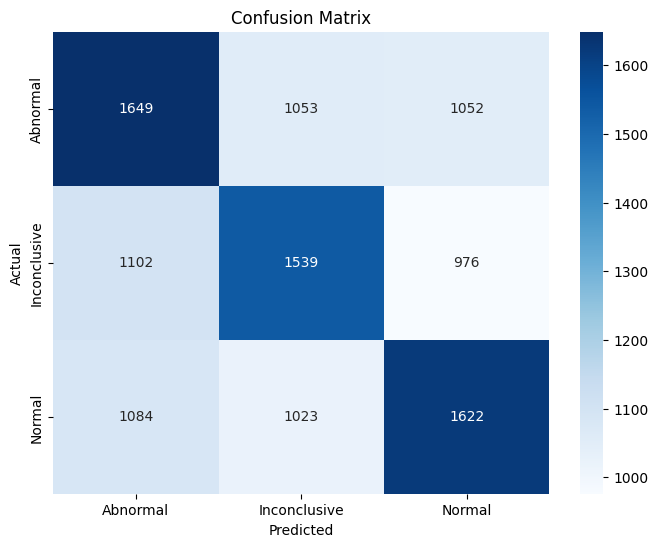

In [10]:
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [13]:
print("\n--- Predicted vs. Actual Values (Test Data) ---")
y_test_labels = le_map['Test Results'].inverse_transform(y_test)
y_pred_labels = le_map['Test Results'].inverse_transform(y_pred)

results_df = pd.DataFrame({
    'Actual': y_test_labels,
    'Predicted': y_pred_labels
})

print(results_df.head(20))

print("\nSupervised Learning Task 2 Complete.")


--- Predicted vs. Actual Values (Test Data) ---
          Actual     Predicted
0   Inconclusive      Abnormal
1       Abnormal  Inconclusive
2   Inconclusive  Inconclusive
3       Abnormal        Normal
4   Inconclusive  Inconclusive
5       Abnormal      Abnormal
6   Inconclusive      Abnormal
7       Abnormal        Normal
8   Inconclusive        Normal
9         Normal      Abnormal
10  Inconclusive  Inconclusive
11      Abnormal        Normal
12  Inconclusive      Abnormal
13  Inconclusive  Inconclusive
14      Abnormal  Inconclusive
15        Normal        Normal
16      Abnormal        Normal
17      Abnormal      Abnormal
18        Normal      Abnormal
19  Inconclusive      Abnormal

Supervised Learning Task 2 Complete.
